# tRNA-seq comparisons

tRNA-seq has been performed on three different occassions with slight modifications to the protocol. Here I compare results.

    2016-08-19-HG3W5AFXX: First run. 
    2016-10-12-HGWGFAFXX: 
    2018-01-12-HWCT5AFXX: 
    
Need to get summary of what differs between runs from Daniel
    
**So far I am using transcript-level quantification (Salmon) to estimate tRNA levels, but would like to try out alternative based on this paper: [Limitation of alignment-free tools in total RNA-seq quantification](https://www.biorxiv.org/content/early/2018/01/11/246967)**

<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>

In [1]:
suppressMessages({
    .libPaths(c("/g/steinmetz/brooks/anaconda/envs/genphen/lib/R/library",
                "/g/steinmetz/brooks/anaconda/lib/R/library",
               "/root/anaconda3/envs/jupyter/lib/R/library"))
    # config opts and libraries
    options(repr.plot.width = 6)
    options(repr.plot.height = 5)
    options(jupyter.plot_mimetypes = 'image/png')
    devtools::source_url("https://raw.githubusercontent.com/scalefreegan/R-tools/master/defaultRlibs.R")
    devtools::source_url("https://raw.githubusercontent.com/scalefreegan/steinmetz-lab/master/yeast2_0/scripts/seqtools.R")
    library(wasabi)
    library(sleuth)
    library(pheatmap)
    library(forcats)
    library(GGally)
    library(VennDiagram)
})

In [2]:
# load ncRNA annotations
load("/g/steinmetz/project/IESY/trna/data/ncRNA_annotations.rda")

## 2018-01-12-HWCT5AFXX

In [3]:
RESULTS_2018_01_12_HWCT5AFXX = "/g/steinmetz/project/IESY/trna/results/2018-01-12-HWCT5AFXX/results/salmon"
rf_2018_01_12_HWCT5AFXX = file.path(RESULTS_2018_01_12_HWCT5AFXX,"all_results.rds")
results_2018_01_12_HWCT5AFXX <- readRDS(rf_2018_01_12_HWCT5AFXX)
results_2018_01_12_HWCT5AFXX  = results_2018_01_12_HWCT5AFXX %>% mutate(experiment="2018-01-12-HWCT5AFXX")

## 2016-08-19-HG3W5AFXX

In [4]:
RESULTS_2016_08_19_HG3W5AFXX = "/g/steinmetz/project/IESY/trna/results/2016-08-19-HG3W5AFXX/salmon/"
rf_2016_08_19_HG3W5AFXX = file.path(RESULTS_2016_08_19_HG3W5AFXX,"all_results.rds")
results_2016_08_19_HG3W5AFXX <- readRDS(rf_2016_08_19_HG3W5AFXX)
results_2016_08_19_HG3W5AFXX  = results_2016_08_19_HG3W5AFXX %>% mutate(experiment="2016-08-19-HG3W5AFXX")

## 2016-10-12-HGWGFAFXX

In [5]:
RESULTS_2016_10_12_HGWGFAFXX = "/g/steinmetz/project/IESY/trna/results/2016-10-12-HGWGFAFXX/salmon/"
rf_2016_10_12_HGWGFAFXX = file.path(RESULTS_2016_10_12_HGWGFAFXX,"all_results.rds")
results_2016_10_12_HGWGFAFXX <- readRDS(rf_2016_10_12_HGWGFAFXX)
results_2016_10_12_HGWGFAFXX  = results_2016_10_12_HGWGFAFXX %>% mutate(experiment="2016-10-12-HGWGFAFXX")

In [6]:
sample2strain = list(
    "prs_alkb" = "BY4741",
    'prs' = "BY4741",
    'js613_alkb' = "JS613",
    'neo_alkb' = "BY4741+neo",
    'js613' = "JS613",
    'neo' = "BY4741+neo",
    'triple-syn+neo' = "synIIIsynVIsynIXR+neo",
    'BY4741+neo' = "BY4741+neo",
    'triple-syn'= "synIIIsynVIsynIXR",
    'BY4741' = "BY4741"
)

sample2alkb = list(
    "prs_alkb" = T,
    'prs' = F,
    'js613_alkb' = T,
    'neo_alkb' = T,
    'js613' = F,
    'neo' = F,
    'triple-syn+neo' = F,
    'BY4741+neo' = F,
    'triple-syn'= F,
    'BY4741' = F
)

sample2neo = list(
    "prs_alkb" = F,
    'prs' = F,
    'js613_alkb' = F,
    'neo_alkb' = T,
    'js613' = F,
    'neo' = T,
    'triple-syn+neo' = T,
    'BY4741+neo' = T,
    'triple-syn'= F,
    'BY4741' = F
)

In [7]:
combined = bind_rows(results_2018_01_12_HWCT5AFXX,
                 results_2016_08_19_HG3W5AFXX,
                 results_2016_10_12_HGWGFAFXX)
combined = combined %>% mutate(strain = as.character(sample2strain[ezsample]),
                               alkb = as.character(sample2alkb[ezsample]),
                               neo = as.character(sample2neo[ezsample]),
                               full_name = str_c(experiment, ezsample, sep="_"))

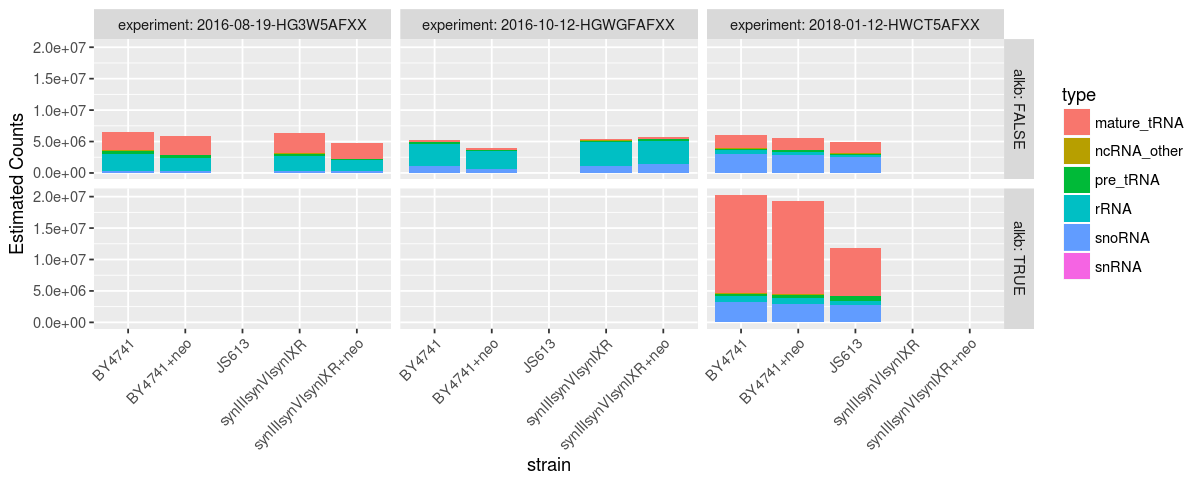

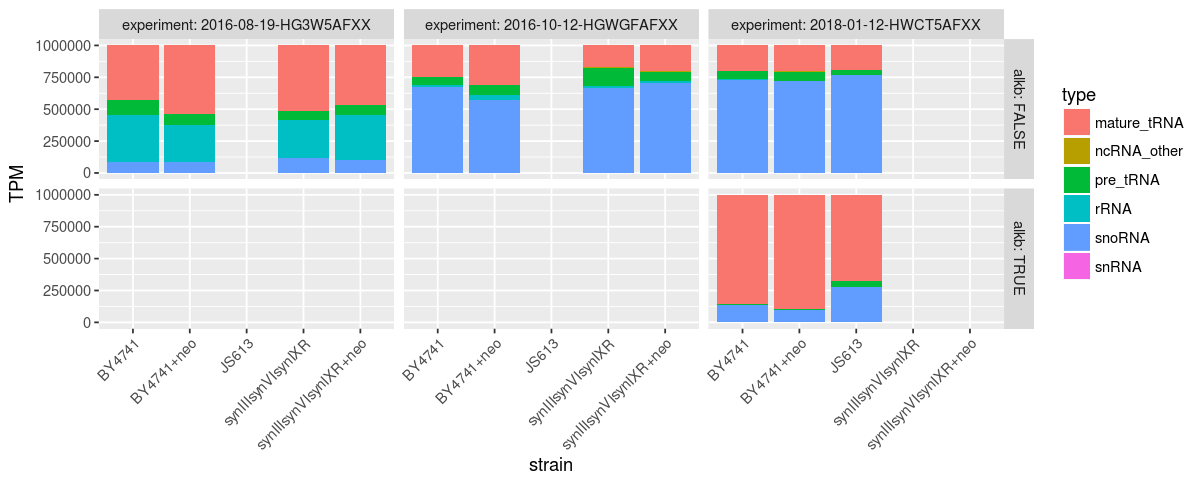

In [8]:
options(repr.plot.width = 10)
options(repr.plot.height = 4)
p1 <- ggplot(combined %>% group_by(type, experiment, strain, alkb, neo) %>% summarise(sum=sum(NumReads))) + 
    geom_bar(aes(y = sum, x = strain, 
        fill = type), stat = "identity") +
        ylab("Estimated Counts") +
    facet_grid(alkb~experiment, labeller = label_both) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
p1
p2 <- ggplot(combined %>% group_by(type, experiment, strain, alkb, neo) %>% summarise(sum=sum(TPM))) + 
    geom_bar(aes(y = sum, x = strain, 
        fill = type), stat = "identity") +
        ylab("TPM") +
    facet_grid(alkb~experiment, labeller = label_both) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
p2

## Pairwise comparison off all small RNA species, strain = BY4741, -AlkB

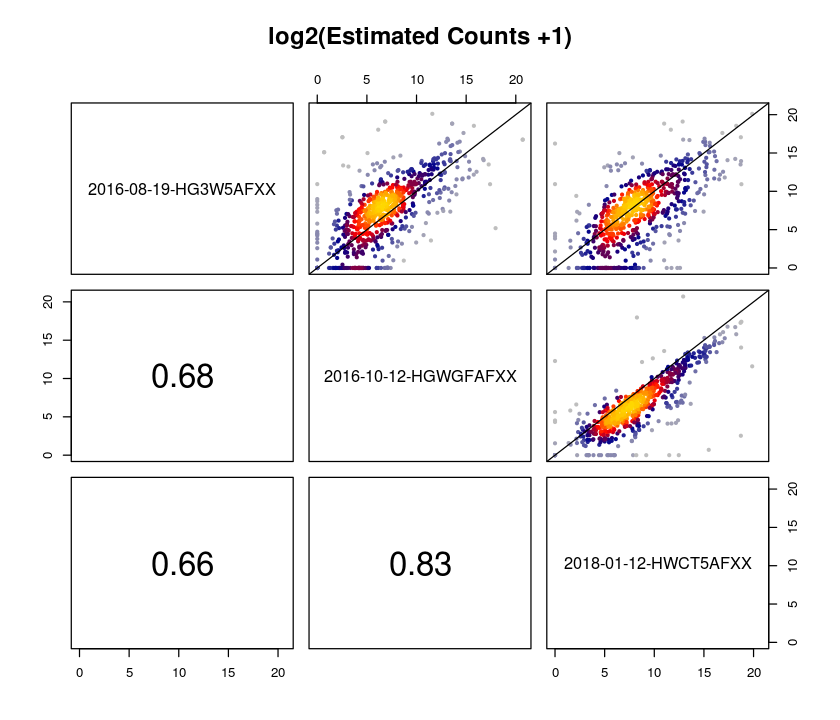

In [9]:
aggresults_by4741 = acast(combined %>% filter(strain == "BY4741",alkb==F), formula = Name ~ experiment, value.var = "NumReads", fun.aggregate = median) 
aggresults_by4741 = log2(aggresults_by4741 + 1)
#colnames(aggresults_by4741) = sample2ezname(colnames(aggresults))
options(repr.plot.width = 7)
options(repr.plot.height = 6)
LSD::heatpairs(aggresults_by4741, main = "log2(Estimated Counts +1)")

## Pairwise comparison off all small RNA species, strain = BY4741+neo, -AlkB

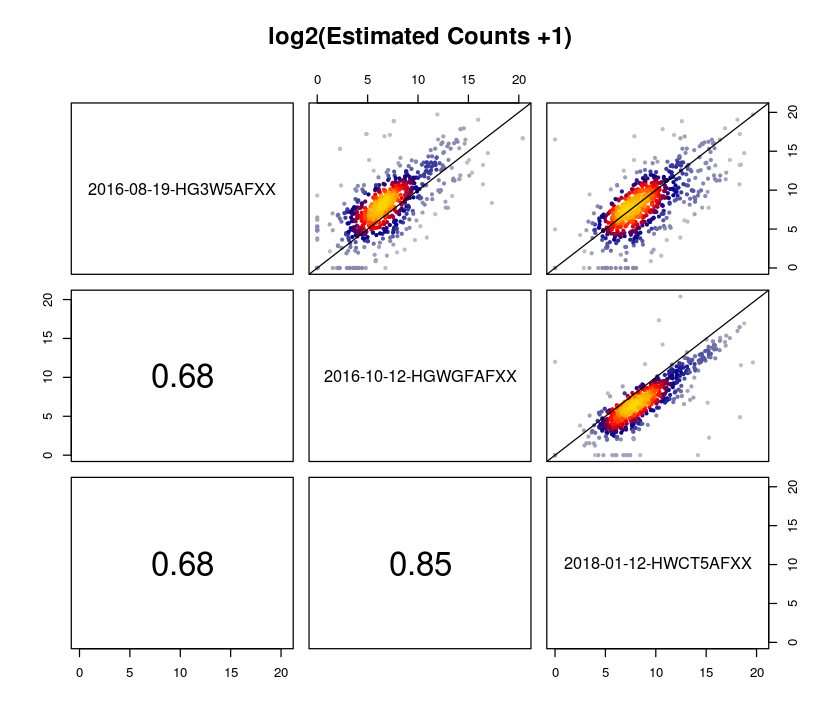

In [10]:
aggresults_by4741 = acast(combined %>% filter(strain == "BY4741+neo",alkb==F), formula = Name ~ experiment, value.var = "NumReads", fun.aggregate = median) 
aggresults_by4741 = log2(aggresults_by4741 + 1)
#colnames(aggresults_by4741) = sample2ezname(colnames(aggresults))
options(repr.plot.width = 7)
options(repr.plot.height = 6)
LSD::heatpairs(aggresults_by4741, main = "log2(Estimated Counts +1)")

## Number of sig differentially expressed tRNAs across data sets

In [11]:
combined %>% filter(grepl("tRNA",Name),qval<=.1, grepl("BY4741",strain)) %>% 
    group_by(experiment) %>% distinct() %>% summarise(sig_trnas=length(unique(Name)))
#,names=str_c(unique(Name),sep = ":")

experiment,sig_trnas
2016-08-19-HG3W5AFXX,59
2016-10-12-HGWGFAFXX,10
2018-01-12-HWCT5AFXX,368


The increased number of hits in 2018-01-12-HWCT5AFXX is likely due to either (1) additional datasets, 4 compared to 6, or -- more likely in my opinion -- (2) inclusion of AlkB treatment as an additional covariate. AlkB samples are the most different and seem to greatly affect tRNA levels, especially mature. 

I tried to model 2018-01-12-HWCT5AFXX without AlkB treatment, but there are too few samples to generate significant hits (3 samples with no replicates)

In [23]:
sgenes_2016_08_19_HG3W5AFXX = combined %>% 
    filter(grepl("tRNA",Name),qval<=.1, 
           grepl("BY4741",strain), 
           experiment=="2016-08-19-HG3W5AFXX") %>% select(Name)
sgenes_2016_08_19_HG3W5AFXX = unique(sgenes_2016_08_19_HG3W5AFXX$Name)

sgenes_2016_10_12_HGWGFAFXX = combined %>% 
    filter(grepl("tRNA",Name),qval<=.1, 
           grepl("BY4741",strain), 
           experiment=="2016-10-12-HGWGFAFXX") %>% select(Name)
sgenes_2016_10_12_HGWGFAFXX = unique(sgenes_2016_10_12_HGWGFAFXX$Name)

sgenes_2018_01_12_HWCT5AFXX = combined %>% 
    filter(grepl("tRNA",Name),qval<=.1, 
           grepl("BY4741",strain), 
           experiment=="2018-01-12-HWCT5AFXX") %>% select(Name)
sgenes_2018_01_12_HWCT5AFXX = unique(sgenes_2018_01_12_HWCT5AFXX$Name)

all_sig_genes = list("2016_08_19" = sgenes_2016_08_19_HG3W5AFXX,
                  "2016_10_12" = sgenes_2016_10_12_HGWGFAFXX,
                  "2018_01_12" = sgenes_2018_01_12_HWCT5AFXX)

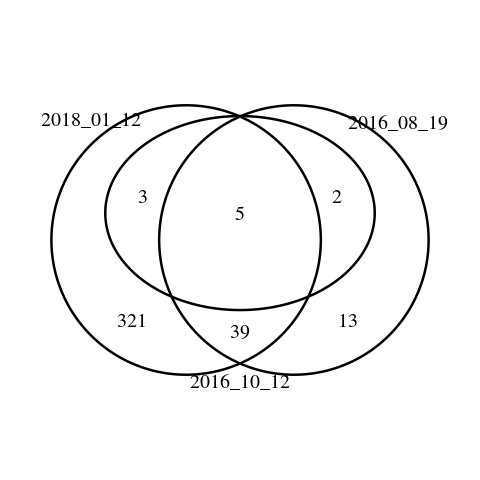

In [26]:
options(repr.plot.width = 4)
options(repr.plot.height = 4)
grid.draw(venn.diagram(all_sig_genes, filename = NULL, margin=.1))

Sig genes are largely overlapping, with the expectption of many more genes "diff expressed" likely due to AlkB treatment